In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/spam.csv", encoding="latin1")  # or encoding="ISO-8859-1"
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

- data cleaning
- eda
- text pre processing
- model building
- evaluation
- improvement
- wesite
- deployment

## #1 Cleaning

In [4]:
df.info() # we will drop last 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace= True)

In [6]:
df.sample(5)

,v1,v2
1983,ham,I wnt to buy a BMW car urgently..its vry urgen...
4750,spam,Your weekly Cool-Mob tones are ready to downlo...
4430,ham,2mro i am not coming to gym machan. Goodnight.
5445,ham,"And that's fine, I got enough bud to last most..."
4989,spam,Phony å£350 award - Todays Voda numbers ending...


In [7]:
df.rename(columns = {"v1": "Target", "v2": "SMS"}, inplace = True)

In [8]:
df.sample(5)

,Target,SMS
5041,spam,Jamster! To get your free wallpaper text HEART...
4009,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...
968,ham,Are you willing to go for aptitude class.
2255,ham,I just lov this line: \Hurt me with the truth
3932,ham,"Playin space poker, u?"


In [9]:
# converting the ham and spam to 0 and 1
# 1
df["Target"] = df["Target"].map({"ham": 0, "spam": 1})
df.head()

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#2
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#le.fit_transform(df["Target"])
#df.head()

In [11]:
# missing values
df.isnull().sum()

Target    0
SMS       0
dtype: int64

In [12]:
# duplicate values
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = "first")

## #2 EDA

In [14]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

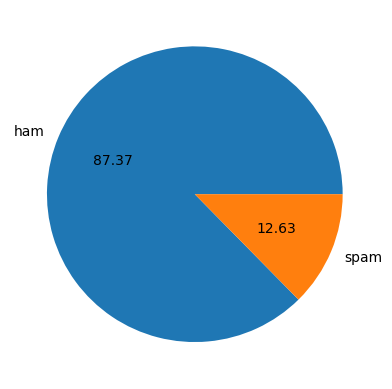

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

- Data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df["num_characters"] = df["SMS"].apply(len) # it return length of each sms

In [19]:
df.head()

,Target,SMS,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#no of word
df["num_words"]= df["SMS"].apply(lambda x: len(nltk.word_tokenize(x))) # this will give no. of words 

In [21]:
df.head()

,Target,SMS,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#no of sentence
df["num_sentences"]= df["SMS"].apply(lambda x: len(nltk.sent_tokenize(x))) # this will give no. of sentences 

In [23]:
df.head()

,Target,SMS,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
#spam
df[df["Target"]==0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#ham
df[df["Target"]==1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

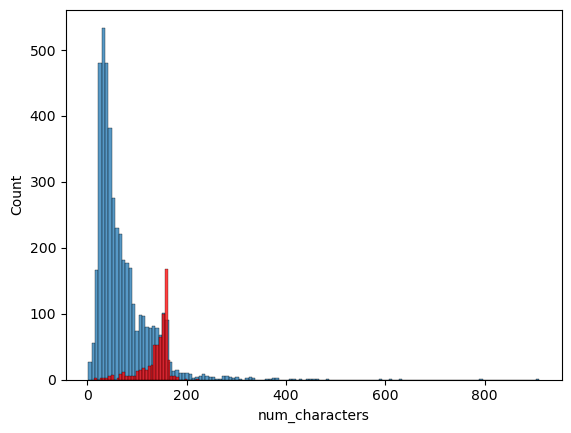

In [27]:
import seaborn as sns
sns.histplot(df[df["Target"]==0]["num_characters"])
sns.histplot(df[df["Target"]==1]["num_characters"],color="red")


- ham messages are made with less number of characters
- spam messages are made with more number of characters

In [28]:
# correlation 
df.corr()

C:\Users\shubu\AppData\Local\Temp\ipykernel_14472\1576546410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\shubu\AppData\Local\Temp\ipykernel_14472\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

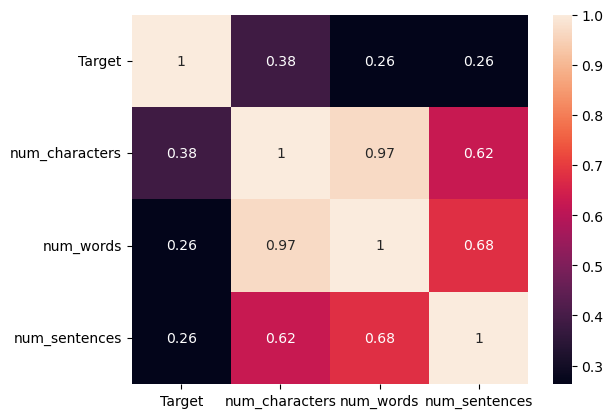

In [29]:
sns.heatmap(df.corr(), annot = True)

- we can see that increasing number of character, words, sentences we most likely get spam sms
##  #3. Data Preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and puctuation
- stemming

In [30]:
#stopwords
from nltk.corpus import stopwords # have no contribution in sentence meaning
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
#punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

- making a function for data processing

In [33]:
def transform_text(text):
    text = text.lower()                        #lowercasing
    text = nltk.word_tokenize(text)            #tokenization
    
    y =[]                                      #removing special characters
    for i in text:
        if i.isalnum(): # alpha numeric
            y.append(i)
    
    text = y[:] #clone the list                #removing stop words and puctuation
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]                                #stemming
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
# doing transformation on data
df["transformed_sms"] = df["SMS"].apply(transform_text)

In [35]:
df.head()

,Target,SMS,num_characters,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##### Word Cloud
-  data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [36]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [37]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_sms'].str.cat(sep=" "))

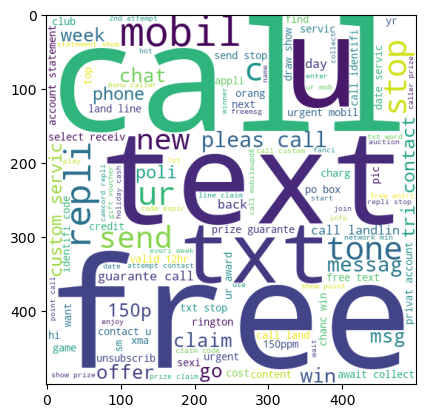

In [38]:
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_sms'].str.cat(sep=" "))

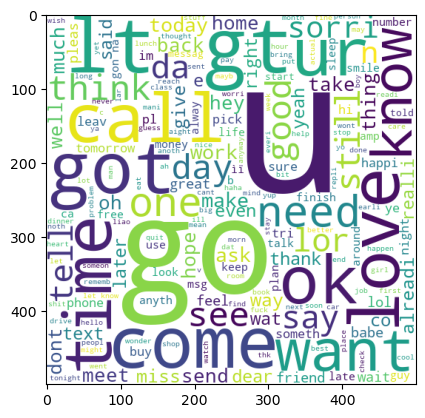

In [40]:
plt.imshow(ham_wc)

In [41]:
df.head()

,Target,SMS,num_characters,num_words,num_sentences,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Finding top 30 words in SPAM

In [42]:
#spam
spam_corpus = []
for message in df[df['Target'] == 1]['transformed_sms'].tolist(): # list of all the messages
    for word in message.split():
        spam_corpus.append(word)
        

In [43]:
len(spam_corpus)

9939

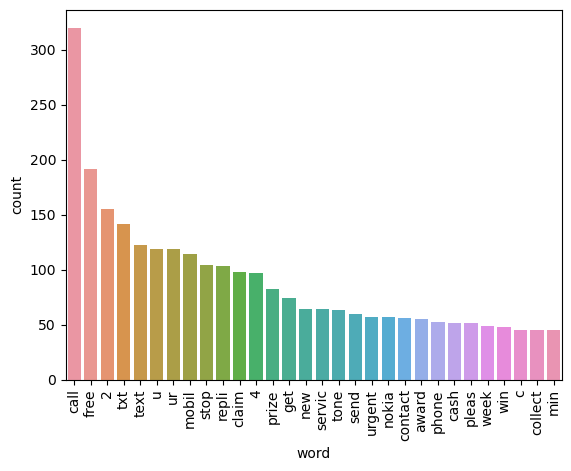

In [44]:
from collections import Counter

# Get the most common 30 words from spam_corpus
common_words = Counter(spam_corpus).most_common(30)

# Convert to a DataFrame
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x=df_common_words['word'], y=df_common_words['count'])

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')
plt.show()

### finding top 30 words in HAM

In [45]:
#spam
ham_corpus = []
for message in df[df['Target'] == 0]['transformed_sms'].tolist(): # list of all the messages
    for word in message.split():
        ham_corpus.append(word)
        

In [46]:
len(ham_corpus)

35404

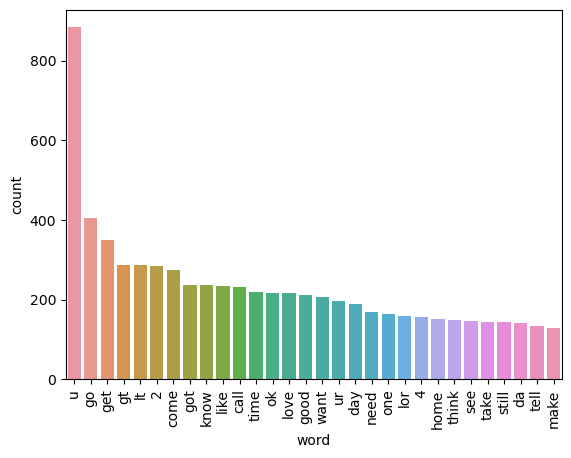

In [47]:
from collections import Counter


common_words = Counter(ham_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(x=df_common_words['word'], y=df_common_words['count'])
plt.xticks(rotation='vertical')
plt.show()

## #4. Model Building

In [62]:
# converting the transformed SMS to vector
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
x = tfidf.fit_transform(df["transformed_sms"]).toarray()

In [64]:
y = df["Target"].values

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # we will check all the naive bayes algos.
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [69]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### clearly, mnb works bestwith tfidf
- we need high precision score

In [71]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

- preprocess the new sms 
- vectorize the sms
- apply algo. to it